In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import pandas as pd
df = pd.read_csv('JPM_1940-01-01_2025-03-04.csv')

In [6]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1980-03-17 00:00:00-05:00,0.0,5.129630,5.018519,5.037037,1.059499,62775
1,1980-03-18 00:00:00-05:00,0.0,5.111111,5.037037,5.074074,1.067288,64125
2,1980-03-19 00:00:00-05:00,0.0,5.166667,5.111111,5.148148,1.082870,40500
3,1980-03-20 00:00:00-05:00,0.0,5.148148,5.092593,5.111111,1.075079,18900
4,1980-03-21 00:00:00-05:00,0.0,5.222222,5.111111,5.222222,1.098450,97200


In [8]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\2118878740.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


In [9]:
# Select features and target
features = ['open', 'high', 'low', 'volume']  # Excluding date and close
X = df[features]
y = df['close']

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [13]:
# Support Vector Machine (SVM)
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [14]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# Model Evaluation
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Model Performance:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("------------------------------")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Random Forest", y_test, y_pred_rf)

Linear Regression Model Performance:
MSE: 0.2589943315993864
R2 Score: 0.9998802909181517
------------------------------
SVM Model Performance:
MSE: 40.98773103743704
R2 Score: 0.98105516974353
------------------------------
Random Forest Model Performance:
MSE: 0.28911024572978067
R2 Score: 0.9998663711215009
------------------------------


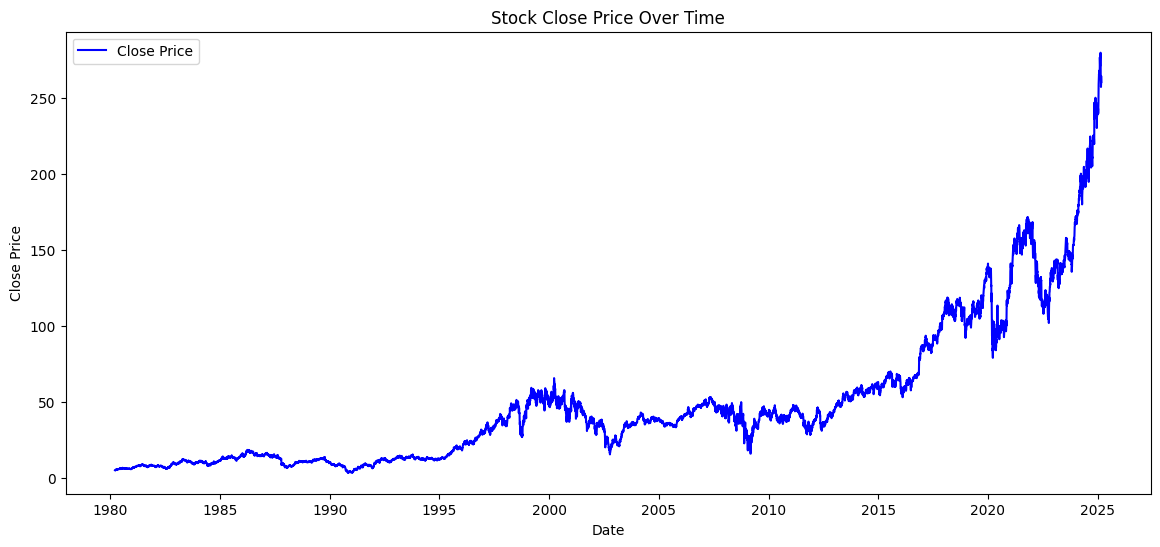

In [16]:
# Visualization
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

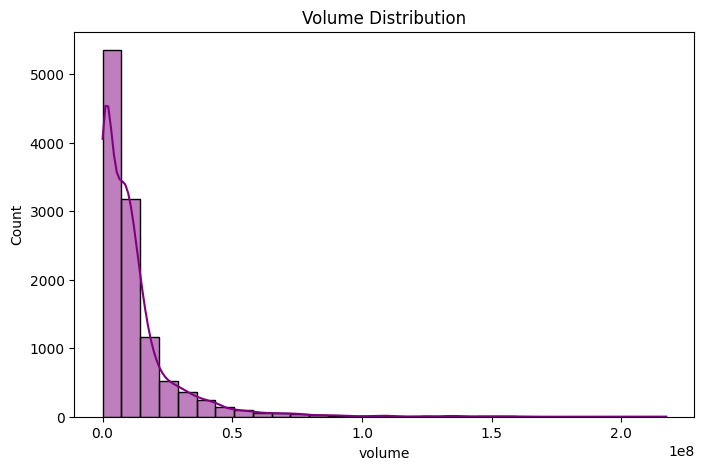

In [17]:
# Histogram of Volume
plt.figure(figsize=(8, 5))
sns.histplot(df['volume'], bins=30, kde=True, color='purple')
plt.title('Volume Distribution')
plt.show()

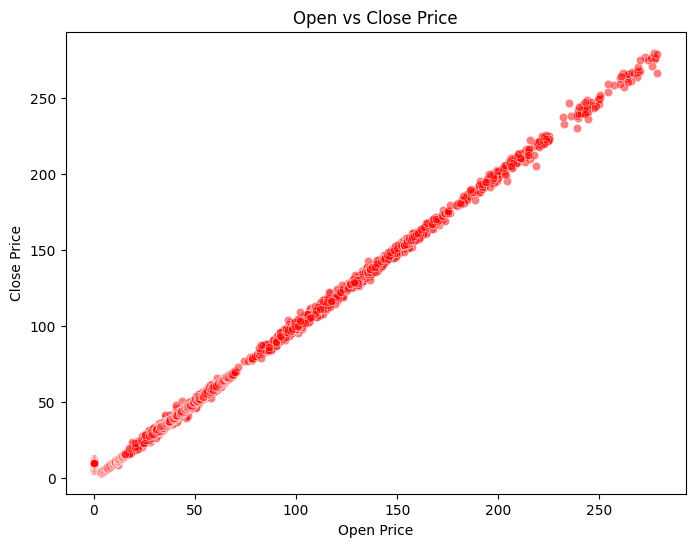

In [19]:
# Scatter Plot: Open vs Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['open'], y=df['close'], alpha=0.5, color='red')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')
plt.show()

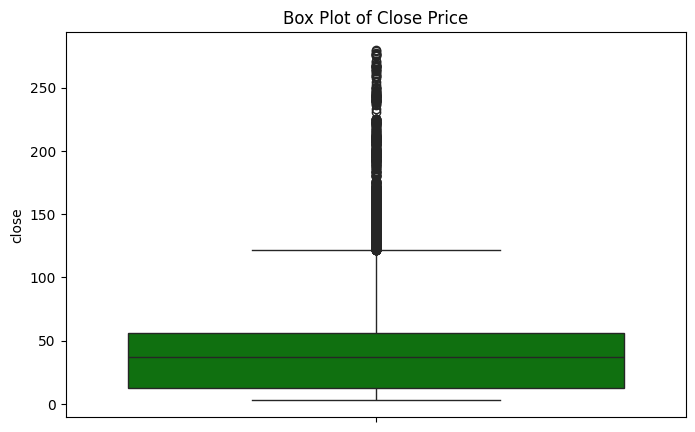

In [20]:
# Box Plot for Close Price
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['close'], color='green')
plt.title('Box Plot of Close Price')
plt.show()